# Muestra de glosario, terapia ocupacional

In [15]:
import json

# Los ficheros deben estar cargados en la sesión de Colab para que funcione esto

# raw_data = json.loads(open("raw_occupational_therapy_eng.json").read())
# gold_data = json.loads(open("gold_occupational_therapy_eng.json").read())

raw_data = json.loads(open("./raw_oc_eng.json").read())
gold_data = json.loads(open("./gold_oc_eng.json").read())

#print(raw_extracted)
#print(gold_data)

raw_terms = [term['forms']['eng'][0]['text'] for term in raw_data]
gold_terms = [term['forms']['eng'][0]['text'] for term in gold_data]

print("Términos extraídos:", len(raw_terms))
#print(raw_terms)

print("Términos válidos:", len(gold_terms))
#print(gold_terms)

#set.intersection(set(raw_terms), set(gold_terms))

Términos extraídos: 1483
Términos válidos: 749


In [16]:
print("<< Raw Terms >>")
print(type(raw_terms))
print(len(raw_terms))
print(raw_terms)

<< Raw Terms >>
<class 'list'>
1483
['pediatric occupational therapy', 'therapy practice', 'occupational therapy practice', 'global performance', 'pediatric occupational therapist', 'motor learning theory', 'collaborative practice', 'escape room', 'rating scale score', 'pediatric practice', 'global performance score', 'performance score', 'Therapy International', 'standardize assessment', 'Structured Clinical', 'therapy practitioner', 'motor learn principle', 'occupational therapy practitioner', 'evidence Synthesis', 'virtual escape', 'examinee', 'scope review', 'SBOT practice', 'scavenger', 'virtual escape room', 'room simulation', 'interexaminer reliability', 'therapy intervention', 'unauthorized reproduction', 'escape room simulation', 'professional reasoning', 'pediatric setting', 'scavenger hunt', 'medical resident', 'dynamic system theory', 'therapy service', 'pmr', 'intervention assessment', 'SBOT', 'Medical Teacher', 'practice habit', 'Cardinal Shan', 'occupational therapy serv

In [17]:
print("<< Gold Terms >>")
print(type(gold_terms))
print(len(gold_terms))
print(gold_terms)

<< Gold Terms >>
<class 'list'>
749
['pediatric occupational therapy', 'occupational therapy practice', 'motor learning theory', 'escape room', 'rating scale score', 'pediatric practice', 'pediatric occupational therapist', 'global performance score', 'interprofessional collaboration', 'motor learning principle', 'collaborative practice', 'standardized assessment', 'OSCE', 'occupational therapy practitioner', 'room simulation', 'virtual escape room', 'participant satisfaction', 'scavenger', 'CAOT', 'therapy intervention', 'scavenger hunt', 'medical resident', 'signi', 'practice habit', 'pediatric setting', 'dynamic system theory', 'Shan Library', 'validity index', 'educational module', 'pediatric medical resident', 'response shift bias', 'sensory integration', 'Wilcoxon sign', 'Therapy Science', 'occupational therapy service', 'clinical competency', 'medline', 'examiner effect', 'virtual scavenger hunt', 'occupational therapy intervention', 'random practice', 'child visit', 'novice pra

In [18]:
# Crear un conjunto para eliminar duplicados y convertir elementos a minúscula
print(f'raw_terms: {len(raw_terms)}')
set_raw_terms = {elemento.lower() for elemento in raw_terms}
print(type(set_raw_terms))

# Crear un conjunto para eliminar duplicados y convertir elementos a minúscula
print(f'gold_terms: {len(gold_terms)}')
set_gold_terms = {elemento.lower() for elemento in gold_terms}
print(type(set_gold_terms))

# Crear una nueva lista a partir del conjunto
list_raw_terms = list(set_raw_terms)
list_gold_terms = list(set_gold_terms)
list_raw_terms.sort()
list_gold_terms.sort()
print('list_raw_terms: ', list_raw_terms)
print('list_gold_terms: ', list_gold_terms)

# Crear un conjunto que contenga elementos comunes entre ambas listas
# elementos_comunes = set_raw_terms.intersection(set_gold_terms)

# Crear el dataset con elementos y el campo booleano
dataset = []

# Recorrer ambos conjuntos originales (lista1 y gold_terms) y crear el dataset
for elemento in set_raw_terms.union(set_gold_terms):
    
    esta_en_raw_terms = elemento in set_raw_terms
    esta_en_gold_terms = elemento in set_gold_terms
    # es_comun = elemento in elementos_comunes
    es_comun = esta_en_raw_terms & esta_en_gold_terms
    
    dataset.append({
        'elemento': elemento,
        'raw': esta_en_raw_terms,
        'gold': esta_en_gold_terms,
        'ambas': es_comun
    })

# Imprimir el dataset
print(f'Elementos: {len(dataset)}')
for registro in dataset:
    print(registro)


raw_terms: 1483
<class 'set'>
gold_terms: 749
<class 'set'>
list_raw_terms:  ['aacpdm evidence report', 'abstract background', 'abstract conceptualization', 'academic challenge', 'academic editor', 'academic mentor', 'academic paper', 'academic participation', 'academic research paper', 'academic responsibility', 'academic status', 'acceptable expert validity', 'acceptable interexaminer', 'acceptable interexaminer reliability', 'acceptable internal consistency', 'acceptable scoring', 'accepted study', 'access article', 'accountability subscale', 'accurate assumption', 'achievable goal', 'active enrollment', 'active experimentation', 'active licensure', 'activitybased intervention', 'actual response', 'actual response rate', 'adapt physical', 'additional barrier', 'additional care', 'additional care need', 'additional educational support', 'additional feedback', 'adequate table', 'adolescence result', 'adolescent mental health', 'adult case', 'adult case study', 'adult motor', 'adult mo

Creación listas de trabajo

In [20]:
# Todo aquello que está en raw
nueva_lista = []
# Todo aquello que solo está en gold y no en raw
solo_gold = []

for elemento in dataset:
    if elemento['raw']:
        # Seleccionar elementos donde 'raw' es False
        nueva_lista.append(elemento)
    else:
        # Seleccionar elementos con 'raw' igual a True
        solo_gold.append(elemento)
        
# solo_gold = [elemento['elemento'] for elemento in dataset if not elemento['raw']]
# nueva_lista = [elemento for elemento in dataset if elemento['raw']]

# Imprime el contenido de solo_gold
print('Solo en gold:', len(solo_gold))
for item in solo_gold:
    print(item, item in list_raw_terms)

Solo en gold: 185
{'elemento': 'skill attainment', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'down framework', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'touro university', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'strategic training', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'feeding concern', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'clinical learning environment', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'medline', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'stroke recovery', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'training fellowship', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'motor learning principle', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'participant interaction', 'raw': False, 'gold': True, 'ambas': False} False
{'elemento': 'usability', 'raw': False, 'gold': T

### Preparación de datos (x, y)

In [21]:
from sklearn.model_selection import train_test_split

# Convertir datos a formato de características y etiquetas
X = [element['elemento'] for element in nueva_lista]
# y tendra el valor que indica si está en la lista gold (True) o no (False)
y = [element['gold'] for element in nueva_lista]

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X: ", len(X), X)
print("X_train: ", len(X_train), X_train)
print("X_test: ", len(X_test), X_test)

print("y: ", len(y), y)
print("y_train: ", len(y_train), y_train)
print("y_test: ", len(y_test), y_test)

X:  1480 ['recent iteration', 'other assessment tool', 'role government management', 'thematic analysis process', 'well visit', 'fieldwork student', 'sbot', 'curriculum mapping', 'physical therapy literature', 'holistic evaluation', 'parent empowerment', 'learn knowledge', 'same script', 'potential service provision', 'occupational therapy service', 'initial search', 'includedwill bethesesandbook', 'central nervous system', 'therapy setting', 'access article', 'degree picture', 'post date', 'remedial handwriting', 'research musculoskeletal', 'therapist value', 'therapy education', 'autonomous stage', 'movement strategy', 'playroom', 'treatment value', 'conventional clinical examination', 'infant view', 'other rehabilitation', 'childhood hallmark', 'individual current practice', 'scope review', 'participatory practice', 'neurorehabilitation', 'remedial handwriting intervention', 'degree scavenger', 'retrospective cohort study', 'practice context', 'rehabilitation literature', 'intensity

### Homogenizar lista de elementos

In [100]:
# El número de elementos depende de la cantidad de palabras por lo que se homogeniza la lista para que todos los elementos tengan 
# el mismo tamaño
def homogenizar_lista(lista):
    # Encuentra la longitud máxima de los elementos en la lista
    longitud_maxima = max(len(elemento) for elemento in lista)

    # Rellena los elementos de la lista con ceros para que tengan la misma longitud
    lista_new = [elemento + [0] * (longitud_maxima - len(elemento)) for elemento in lista]

    return lista_new

# Prueba
homogenizar_lista([[92, 93, 179], [10, 15, 31], [430, 16], [431], [180, 258, 24], [92, 259, 1], [1, 31]])

[[92, 93, 179],
 [10, 15, 31],
 [430, 16, 0],
 [431, 0, 0],
 [180, 258, 24],
 [92, 259, 1],
 [1, 31, 0]]

### Dibujar matriz de confusión

In [99]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (4,3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### CountVectorizer - Transformación de X a valores numéricos

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Crear un vectorizador de texto
# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()

print("X: ", type(X), len(X), X)
print("y: ", type(y), len(y), y)

#Transformar los datos de texto en características numéricas#
X_numerical = vectorizer.fit_transform(X)
oth = vectorizer.get_feature_names_out()

print("get_feature_names_out: ", type(oth), oth.shape, oth)

#Dividir los datos en conjuntos de entrenamiento y prueba#
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

print("X: ", X)
print("X_numerical: ", type(X_numerical), X_numerical)
print("X_train_v: ", type(X_train_v), X_train_v.shape)
print("X_test_v: ", type(X_test_v), X_test_v.shape)
print("y_train_v: ", type(y_train_v), len(y_train_v))

X:  <class 'list'> 1480 ['recent iteration', 'other assessment tool', 'role government management', 'thematic analysis process', 'well visit', 'fieldwork student', 'sbot', 'curriculum mapping', 'physical therapy literature', 'holistic evaluation', 'parent empowerment', 'learn knowledge', 'same script', 'potential service provision', 'occupational therapy service', 'initial search', 'includedwill bethesesandbook', 'central nervous system', 'therapy setting', 'access article', 'degree picture', 'post date', 'remedial handwriting', 'research musculoskeletal', 'therapist value', 'therapy education', 'autonomous stage', 'movement strategy', 'playroom', 'treatment value', 'conventional clinical examination', 'infant view', 'other rehabilitation', 'childhood hallmark', 'individual current practice', 'scope review', 'participatory practice', 'neurorehabilitation', 'remedial handwriting intervention', 'degree scavenger', 'retrospective cohort study', 'practice context', 'rehabilitation literatu

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Convertir los textos a vectores numericos usando TF-IDF
vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(X)

# Dividir los datos en train y test
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X2, y, test_size=0.2, random_state=42)

# Entrenar el clasificador lineal SVC
clf = SVC()
history_clf = clf.fit(X_train_v, y_train_v)

# Evaluar el modelo
print("Accuracy on test set: {:.3f}".format(clf.score(X_test_v, y_test_v)))

Accuracy on test set: 0.649


Dibujamos Matriz de Confusión

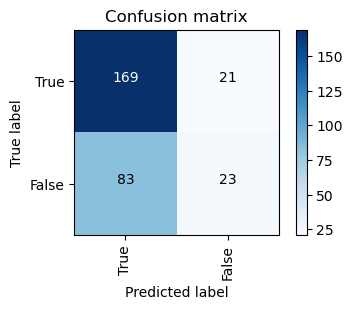

In [102]:
from sklearn.metrics import confusion_matrix
  
# Evaluar en datos de validación  
# Obtener las predicciones del modelo
y_pred = clf.predict(X_test_v)

# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(y_test_v, y_pred)

plot_confusion_matrix(matriz_confusion, classes=['True', 'False'])

### Preprocesamiento - Crear un objeto Tokenizer

In [24]:

# Ejemplo de lo que hace Tokenizer
# Asigna un valor numérico a cada palabra del corpus en base al número de apariciones
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['hello world', 'deep learning is fun', 'world is fun', 'fun fun']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

print(sequences)

[[4, 2], [5, 6, 3, 1], [2, 3, 1], [1, 1]]


In [85]:

from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Preprocesamiento - Crear un objeto Tokenizer
tokenizer = Tokenizer()

# Ajustar el tokenizador a los textos
tokenizer.fit_on_texts(X)

# Convertir los textos en secuencias de números enteros
X_token = tokenizer.texts_to_sequences(X)

print("Sin homogenizar: ", type(X_token), len(X_token), X_token[:5])
X_token = homogenizar_lista(X_token)
print("Homogenizado: ", type(X_token), len(X_token), X_token[:5])

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_token, y, test_size=0.2, random_state=42)
print("X_train: ", type(X_train), len(X_train))
print("X_test: ", type(X_test), len(X_test))
num_elementos = len(X_train[0])
print("y_train: ", type(y_train), len(y_train), y_train)
print("Num elementos: ", num_elementos)

y_train = [int(x) for x in y_train]
y_test = [int(x) for x in y_test]
print("y_train: ", type(y_train), len(y_train), y_train)

Sin homogenizar:  <class 'list'> 1480 [[523, 524], [27, 21, 28], [56, 216, 217], [126, 50, 44], [97, 218]]
Homogenizado:  <class 'list'> 1480 [[523, 524, 0], [27, 21, 28], [56, 216, 217], [126, 50, 44], [97, 218, 0]]
X_train:  <class 'list'> 1184
X_test:  <class 'list'> 296
y_train:  <class 'list'> 1184 [False, False, False, True, False, False, False, True, False, True, False, True, True, False, False, False, False, True, False, True, False, False, False, True, False, True, True, True, True, True, False, False, True, False, True, True, True, False, False, True, True, True, False, True, False, False, True, False, True, False, True, True, False, True, True, False, False, False, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, True, True, True, False, True, True, True, False, True, False, True, False, True, True, False, False, Fal

### Redes Neuronales con TensorFlow/Keras

In [105]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer

# Inicializar y definir el modelo de red neuronal
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_ANN = model_tf.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
_, accuracy_ANN = model_tf.evaluate(X_test, y_test)
print("Precisión del modelo de Red Neuronal:", accuracy_ANN)


Epoch 1/20
37/37 [==============================] - 1s 6ms/step - loss: 11.9084 - accuracy: 0.5397 - val_loss: 4.1444 - val_accuracy: 0.5946
Epoch 2/20
37/37 [==============================] - 0s 3ms/step - loss: 2.6245 - accuracy: 0.5608 - val_loss: 2.4000 - val_accuracy: 0.5135
Epoch 3/20
37/37 [==============================] - 0s 3ms/step - loss: 1.5947 - accuracy: 0.5549 - val_loss: 1.4696 - val_accuracy: 0.5946
Epoch 4/20
37/37 [==============================] - 0s 3ms/step - loss: 1.0077 - accuracy: 0.5321 - val_loss: 0.9871 - val_accuracy: 0.4155
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 0.8566 - accuracy: 0.5541 - val_loss: 0.8185 - val_accuracy: 0.6351
Epoch 6/20
37/37 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.5583 - val_loss: 1.2765 - val_accuracy: 0.6520
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.8397 - accuracy: 0.5870 - val_loss: 0.7912 - val_accuracy: 0.6284
Epoch 8/20
37/37 [=

### CatBoost

In [73]:
!pip install catboost

In [78]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Inicializar y entrenar el modelo CatBoost
print("X_train: ", X_train)
# feature_names = X.columns.tolist()
# catboost_model = CatBoostClassifier(iterations=100, depth=10, cat_features=['elemento'], feature_names=feature_names, random_state=42)
catboost_model = CatBoostClassifier(iterations=100, depth=10, random_state=42)
history_ctb = catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = catboost_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo CatBoost:", accuracy)

X_train:  [[178, 648, 0], [423, 30, 0], [449, 296, 0], [234, 125, 0], [347, 0, 0], [29, 519, 0], [863, 864, 211], [759, 344, 53], [48, 88, 0], [260, 2, 111], [737, 335, 0], [489, 807, 0], [153, 17, 0], [3, 1, 288], [337, 54, 0], [96, 80, 0], [598, 66, 0], [3, 1, 121], [304, 224, 100], [858, 129, 0], [2, 146, 0], [9, 986, 0], [302, 146, 0], [39, 31, 144], [347, 22, 0], [60, 334, 53], [14, 45, 0], [42, 141, 0], [169, 63, 141], [625, 0, 0], [912, 283, 0], [120, 41, 0], [1, 192, 0], [223, 187, 0], [10, 18, 262], [14, 237, 0], [159, 21, 0], [227, 58, 0], [14, 67, 276], [108, 374, 0], [839, 11, 0], [5, 24, 0], [120, 41, 477], [282, 4, 8], [824, 34, 13], [97, 21, 8], [33, 13, 253], [43, 20, 12], [7, 33, 13], [383, 263, 0], [13, 48, 0], [882, 0, 0], [335, 336, 0], [374, 49, 0], [165, 21, 0], [361, 362, 0], [210, 298, 0], [100, 174, 0], [302, 212, 514], [875, 55, 0], [904, 0, 0], [444, 157, 18], [1021, 79, 0], [186, 427, 0], [9, 5, 0], [6, 2, 0], [145, 292, 480], [155, 204, 22], [35, 182, 0], [

### Embeddings en Modelos de Aprendizaje Profundo

In [92]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

print("X_train: ", type(X_train), len(X_train), X_train)
print("X_test: ", type(X_test), len(X_test), X_test)

# Pad secuencias para que tengan la misma longitud
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train)
max_len = X_train_padded.shape[1]
print("max_len: ", max_len)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

X_train_padded = X_train_padded.tolist()
X_test_padded = X_test_padded.tolist()

print("X_train_padded: ", type(X_train_padded), len(X_train_padded), X_train_padded)
print("X_test_padded: ", type(X_test_padded), len(X_test_padded), X_test_padded)

# Inicializar y definir el modelo de aprendizaje profundo con embeddings
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_emb = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluar el modelo en el conjunto de prueba
_, accuracy = model.evaluate(X_test_padded, y_test)
print("Precisión del modelo de aprendizaje profundo con embeddings:", accuracy)


X_train:  <class 'list'> 1184 [[178, 648, 0], [423, 30, 0], [449, 296, 0], [234, 125, 0], [347, 0, 0], [29, 519, 0], [863, 864, 211], [759, 344, 53], [48, 88, 0], [260, 2, 111], [737, 335, 0], [489, 807, 0], [153, 17, 0], [3, 1, 288], [337, 54, 0], [96, 80, 0], [598, 66, 0], [3, 1, 121], [304, 224, 100], [858, 129, 0], [2, 146, 0], [9, 986, 0], [302, 146, 0], [39, 31, 144], [347, 22, 0], [60, 334, 53], [14, 45, 0], [42, 141, 0], [169, 63, 141], [625, 0, 0], [912, 283, 0], [120, 41, 0], [1, 192, 0], [223, 187, 0], [10, 18, 262], [14, 237, 0], [159, 21, 0], [227, 58, 0], [14, 67, 276], [108, 374, 0], [839, 11, 0], [5, 24, 0], [120, 41, 477], [282, 4, 8], [824, 34, 13], [97, 21, 8], [33, 13, 253], [43, 20, 12], [7, 33, 13], [383, 263, 0], [13, 48, 0], [882, 0, 0], [335, 336, 0], [374, 49, 0], [165, 21, 0], [361, 362, 0], [210, 298, 0], [100, 174, 0], [302, 212, 514], [875, 55, 0], [904, 0, 0], [444, 157, 18], [1021, 79, 0], [186, 427, 0], [9, 5, 0], [6, 2, 0], [145, 292, 480], [155, 204, 

### Modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Crear el modelo de clasificación#
model = MultinomialNB()

#Entrenar el modelo#
model_MultinomialNB = model.fit(X_train, y_train)

#Evaluar el modelo#
accuracy = model.score(X_test, y_test)

print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.6531531531531531


In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

print(X_train[0])

# Inicializar y definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
_, accuracy = model.evaluate(X_test, y_test)
print("\nPrecisión del modelo de Red Neuronal:", accuracy)

[654, 655, 656]
Epoch 1/50
19/19 [==============================] - 1s 11ms/step - loss: 2.9341 - accuracy: 0.5515 - val_loss: 1.1616 - val_accuracy: 0.5912
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 1.4932 - accuracy: 0.5541 - val_loss: 0.8430 - val_accuracy: 0.5574
Epoch 3/50
19/19 [==============================] - 0s 5ms/step - loss: 1.3489 - accuracy: 0.5718 - val_loss: 0.9041 - val_accuracy: 0.6047
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 1.1960 - accuracy: 0.5566 - val_loss: 0.7606 - val_accuracy: 0.5811
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 1.0713 - accuracy: 0.5718 - val_loss: 0.7861 - val_accuracy: 0.5473
Epoch 6/50
19/19 [==============================] - 0s 5ms/step - loss: 1.0084 - accuracy: 0.5650 - val_loss: 0.8450 - val_accuracy: 0.5912
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 1.0386 - accuracy: 0.5828 - val_loss: 0.8251 - val_accuracy: 0.5608
Epo

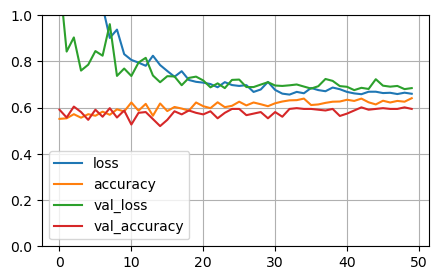

In [ ]:
import pandas as pd
# Graficar datos history 
pd.DataFrame(history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Validación Cruzada

Pliegue 1, Score: 0.6149, Precision: 0.0000, Exhaustividad: 0.0000, F1 score: 0.0000
Pliegue 2, Score: 0.6216, Precision: 1.0000, Exhaustividad: 0.0088, F1 score: 0.0175
Pliegue 3, Score: 0.6115, Precision: 0.4167, Exhaustividad: 0.0442, F1 score: 0.0800
Pliegue 4, Score: 0.6149, Precision: 0.2500, Exhaustividad: 0.0089, F1 score: 0.0172
Pliegue 5, Score: 0.6318, Precision: 0.7143, Exhaustividad: 0.0446, F1 score: 0.0840
Score promedio: 0.6189189189189189


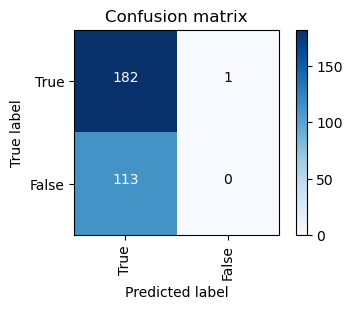

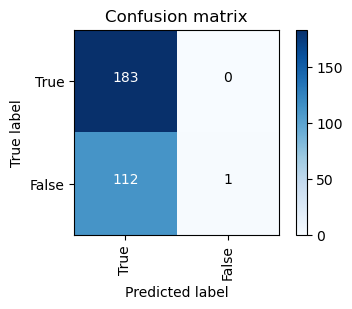

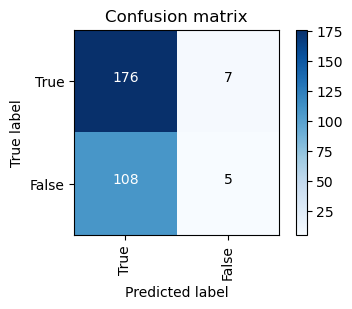

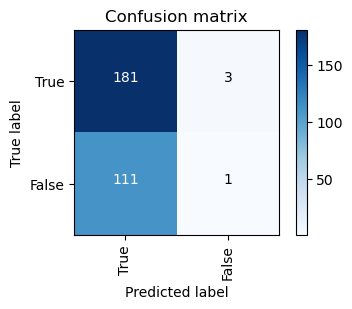

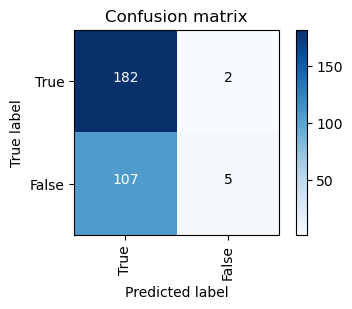

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definir pliegues de la validación cruzada  
kfold = StratifiedKFold(n_splits=5)
scores = 0
cont = 0

# Recorrer cada pliegue
for train_indices, val_indices in kfold.split(X, y):

  # Convertir los arrays de NumPy a listas
  train_indices_list = train_indices.tolist()
  val_indices_list = val_indices.tolist()

  # Usar las listas como índices para dividir la lista 'X'
  X_train = [X_token[i] for i in train_indices_list]
  X_val = [X_token[i] for i in val_indices_list]
  
  # Usar las listas como índices para dividir la lista 'y'
  y_train = [y[i] for i in train_indices_list]
  y_val = [y[i] for i in val_indices_list]

  # Configurar modelo  
  model = LogisticRegression()

  # Entrenar  
  model.fit(X_train, y_train)

  # Evaluar en datos de validación  
  # Obtener las predicciones del modelo
  y_pred = model.predict(X_val)

  # Obtener la matriz de confusión
  matriz_confusion = confusion_matrix(y_val, y_pred)
  
  # Calcular la precisión
  precision = precision_score(y_val, y_pred)

  # Calcular la exhaustividad
  exhaustividad = recall_score(y_val, y_pred)

  # Calcular la puntuación F1
  f1 = f1_score(y_val, y_pred)
  
  # Calcular la exactitud
  val_score = accuracy_score(y_val, y_pred)
  scores += val_score

  cont += 1
  print(f'Pliegue {cont}, Score: {val_score:.4f}, Precision: {precision:.4f}, Exhaustividad: {exhaustividad:.4f}, F1 score: {f1:.4f}')
  
  plot_confusion_matrix(matriz_confusion, classes=['True', 'False'])

# Promediar scores de cada pliegue
print('Score promedio:', scores / kfold.n_splits)



Compare Multiple Classifiers:

Accuracy:

LR: 0.615724 (0.031707)
RF: 0.598042 (0.052341)
KNN: 0.606488 (0.043003)
SVM: 0.614029 (0.030276)


c:\Users\lealp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lealp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lealp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lealp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lealp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\lealp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

LSVM: 0.581990 (0.050714)
GNB: 0.614898 (0.028053)
DTC: 0.589546 (0.051569)
MNB: 0.636063 (0.036056)
GBC: 0.642807 (0.044180)
LDA: 0.613182 (0.030084)


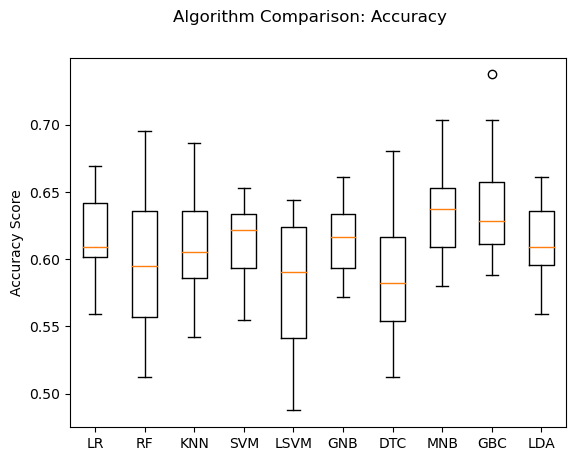


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
MNB = MultinomialNB
GBC = GradientBoostingClassifier
LDA = LinearDiscriminantAnalysis



In [ ]:

# from PIL import Image, ImageFilter, ImageStat
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import cv2, glob
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# import scipy
# import PIL
# import os
# import itertools
# from sklearn import model_selection
# import sklearn
# from keras import backend as K
# from keras.layers import Conv2D, MaxPooling2D
# import keras
# from keras.models import Sequential, model_from_json
# from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
# from keras.layers import Dense, Activation, Dropout
# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, Activation
# from keras.optimizers import RMSprop, SGD, Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras import callbacks
# from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# import lightgbm as lgb
from catboost import CatBoostClassifier

# Compare Performance of Classification Algorithms
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """    
    print('\nCompare Multiple Classifiers:\n')
    print('Accuracy:\n')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC(random_state=42)))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('MNB', MultinomialNB()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))       
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = KFold(n_splits=10)
        accuracy_results = cross_val_score(model, a, b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)  
        
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Accuracy Score')
    plt.show()
    return

compareABunchOfDifferentModelsAccuracy(X_train, y_train, X_val, y_val)

def defineModels():
    print('\nLR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('MNB = MultinomialNB')
    print('GBC = GradientBoostingClassifier')
    print('LDA = LinearDiscriminantAnalysis')
    print('')
    
defineModels()